In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Required Libraries
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from sklearn.metrics import auc
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Healthcare Workshop/Healthcare-Diabetes.csv')

data_info = data.info()
data_head = data.head()

data_head, data_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        2768 non-null   int64  
 1   Pregnancies               2768 non-null   int64  
 2   Glucose                   2768 non-null   int64  
 3   BloodPressure             2768 non-null   int64  
 4   SkinThickness             2768 non-null   int64  
 5   Insulin                   2768 non-null   int64  
 6   BMI                       2768 non-null   float64
 7   DiabetesPedigreeFunction  2768 non-null   float64
 8   Age                       2768 non-null   int64  
 9   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 216.4 KB


(   Id  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
 0   1            6      148             72             35        0  33.6   
 1   2            1       85             66             29        0  26.6   
 2   3            8      183             64              0        0  23.3   
 3   4            1       89             66             23       94  28.1   
 4   5            0      137             40             35      168  43.1   
 
    DiabetesPedigreeFunction  Age  Outcome  
 0                     0.627   50        1  
 1                     0.351   31        0  
 2                     0.672   32        1  
 3                     0.167   21        0  
 4                     2.288   33        1  ,
 None)

In [ ]:
data.describe()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000
mean,1384.500000,3.742775,121.102601,69.134393,20.824422,80.127890,32.137392,0.471193,33.132225,0.343931
std,799.197097,3.323801,32.036508,19.231438,16.059596,112.301933,8.076127,0.325669,11.777230,0.475104
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,692.750000,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.244000,24.000000,0.000000
50%,1384.500000,3.000000,117.000000,72.000000,23.000000,37.000000,32.200000,0.375000,29.000000,0.000000
75%,2076.250000,6.000000,141.000000,80.000000,32.000000,130.000000,36.625000,0.624000,40.000000,1.000000
max,2768.000000,17.000000,199.000000,122.000000,110.000000,846.000000,80.600000,2.420000,81.000000,1.000000


In [ ]:
print(data.size)
print(data.shape)

27680
(2768, 10)


In [ ]:
data.isnull().sum()   # 0 means data is correct

,0
Id,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
data.tail()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
2763,2764,2,75,64,24,55,29.7,0.370,33,0
2764,2765,8,179,72,42,130,32.7,0.719,36,1
2765,2766,6,85,78,0,0,31.2,0.382,42,0
2766,2767,0,129,110,46,130,67.1,0.319,26,1
2767,2768,2,81,72,15,76,30.1,0.547,25,0


In [ ]:
import numpy as np
from scipy import stats

# List of columns to check outlier(it must be numerical)

columns = [
    'Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age'
]

# Checking for outliers in columns using Z-scores
z_scores = np.abs(stats.zscore(data[columns]))

# Identifying rows with any Z-score greater than 3, indicating outliers
outliers = data[(z_scores > 3).any(axis=1)]

# Displaying the number of outliers found in the dataset
outliers_info = outliers.shape
outliers_info

(291, 10)

In [ ]:
data['Outcome'].value_counts()

,count
Outcome,
0,1816
1,952


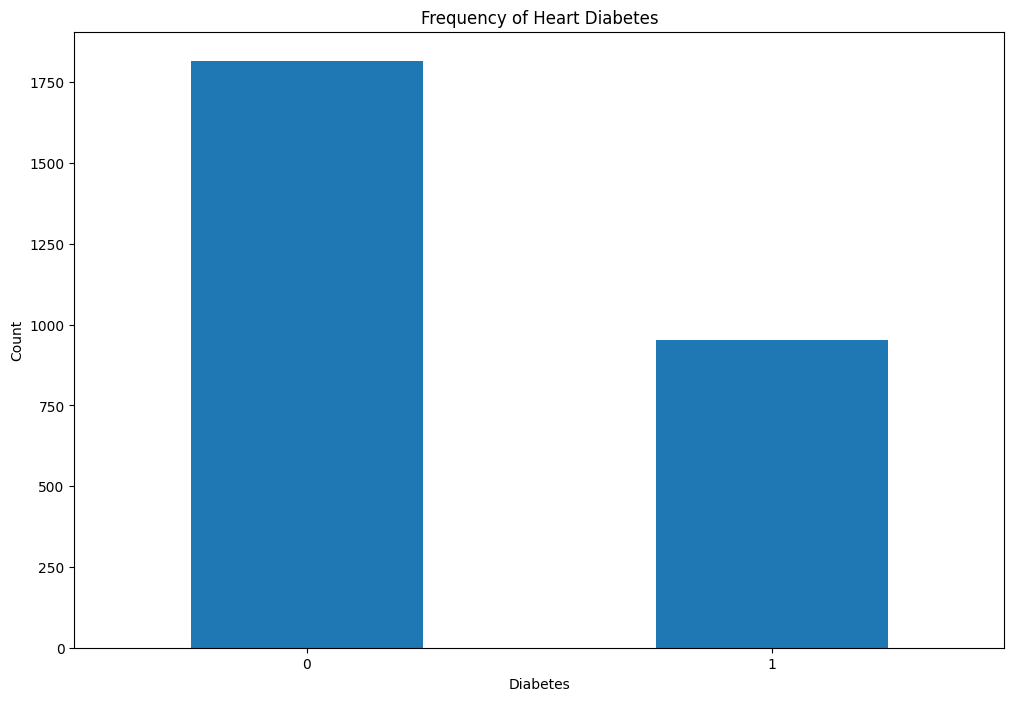

In [ ]:
# 1. Bar Plots for comparing the frequency of different symptoms

# Set the figure size
plt.figure(figsize=(12, 8))

# Plot the count of heart disease cases (0 = No, 1 = Yes)
data['Outcome'].value_counts().plot(kind='bar')

# Set the title and labels
plt.title('Frequency Diabetes')
plt.ylabel('Count')
plt.xlabel('Diabetes')
plt.xticks(rotation=0)

# Display the plot
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

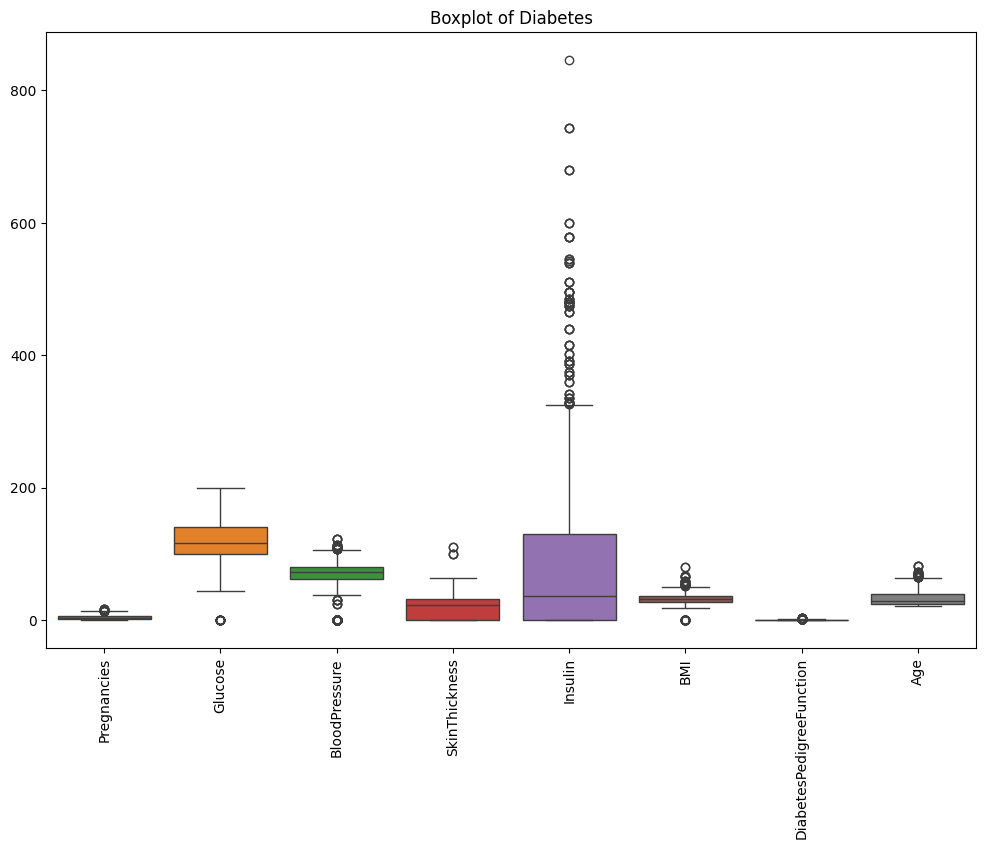

In [ ]:
# 2. Box Plots to check distribution and outliers

plt.figure(figsize=(12, 8))
sns.boxplot(data=data[columns])
plt.title('Boxplot of Diabetes')
plt.xticks(rotation=90)
plt.show()

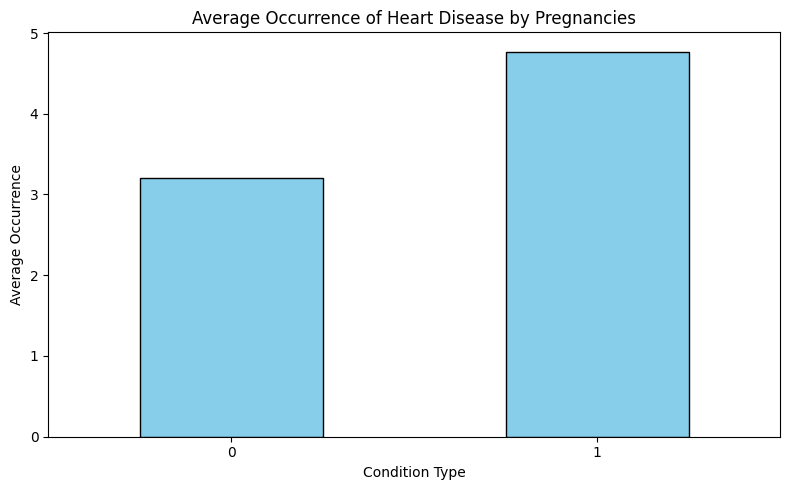

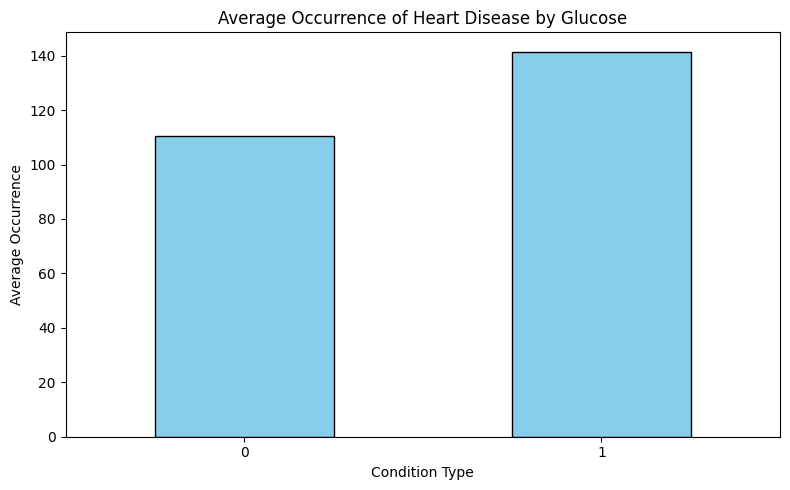

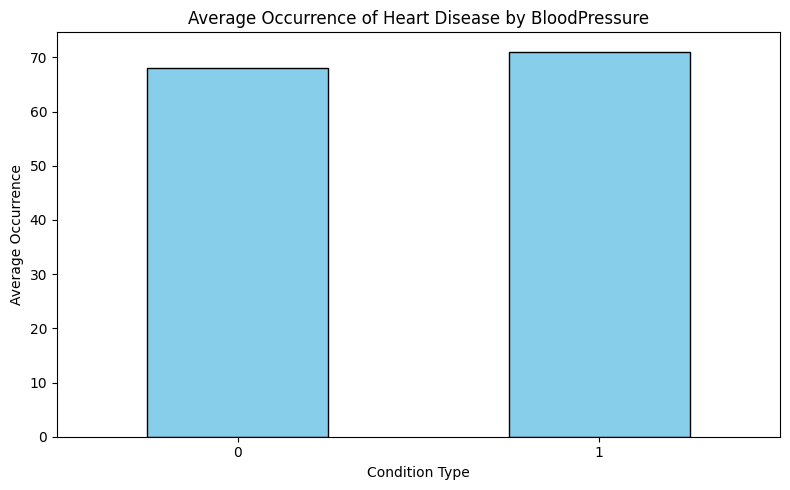

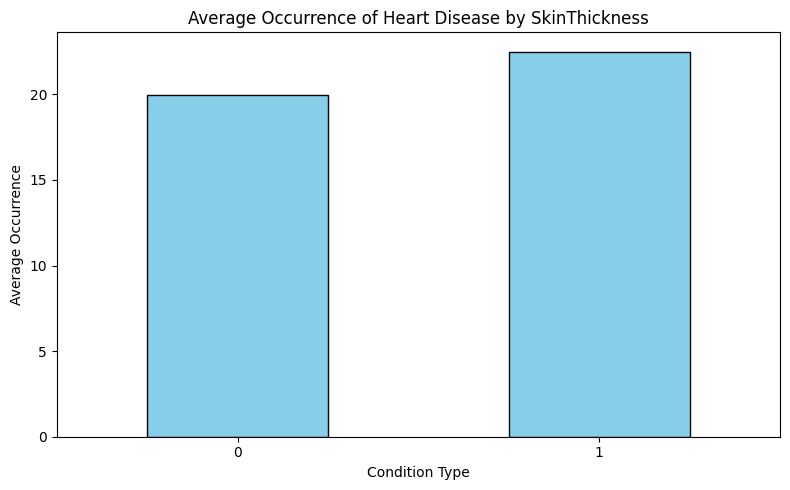

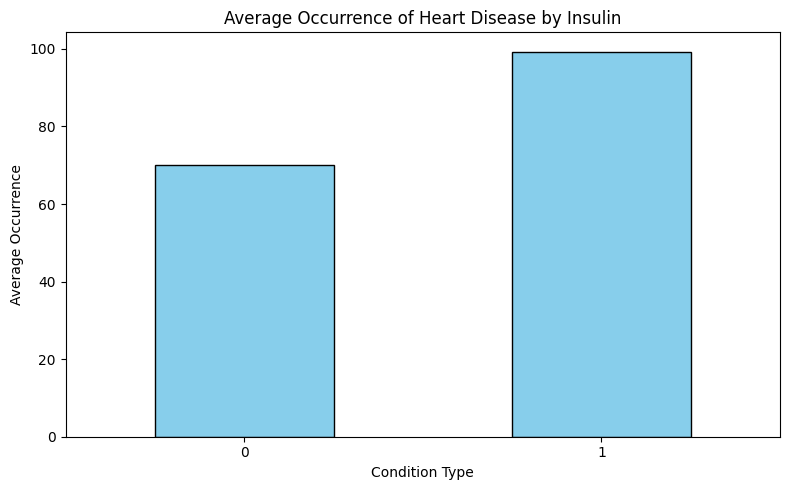

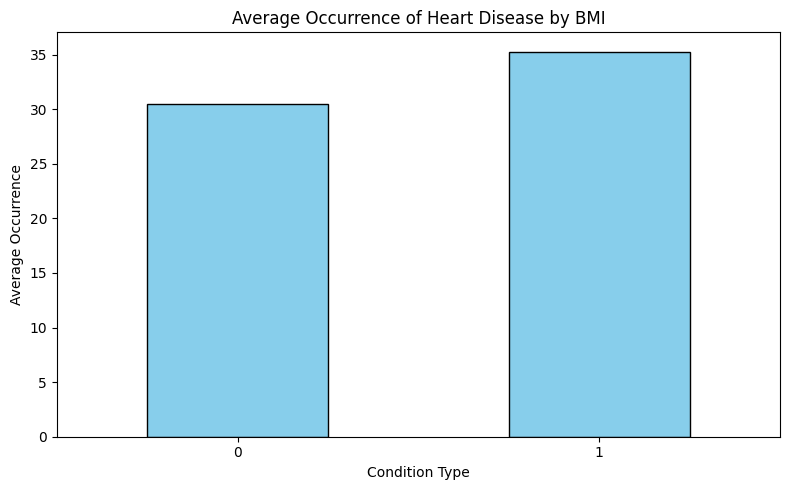

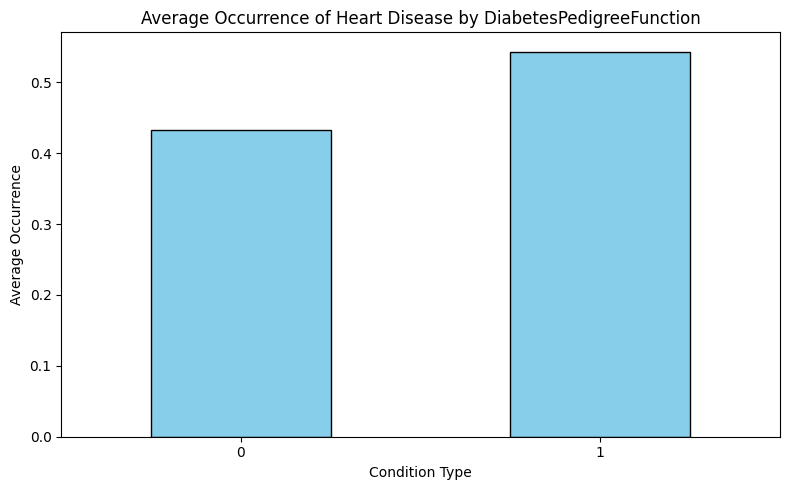

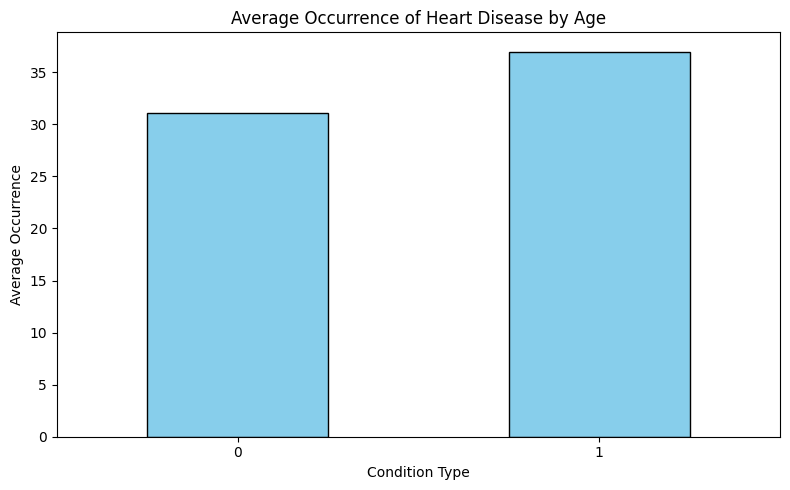

In [ ]:
# Create visualizations for each column
for column in columns:
    plt.figure(figsize=(8, 5))
    data.groupby('Outcome')[column].mean().plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f'Average Occurrence of Heart Disease by {column}')
    plt.ylabel('Average Occurrence')
    plt.xlabel('Condition Type')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

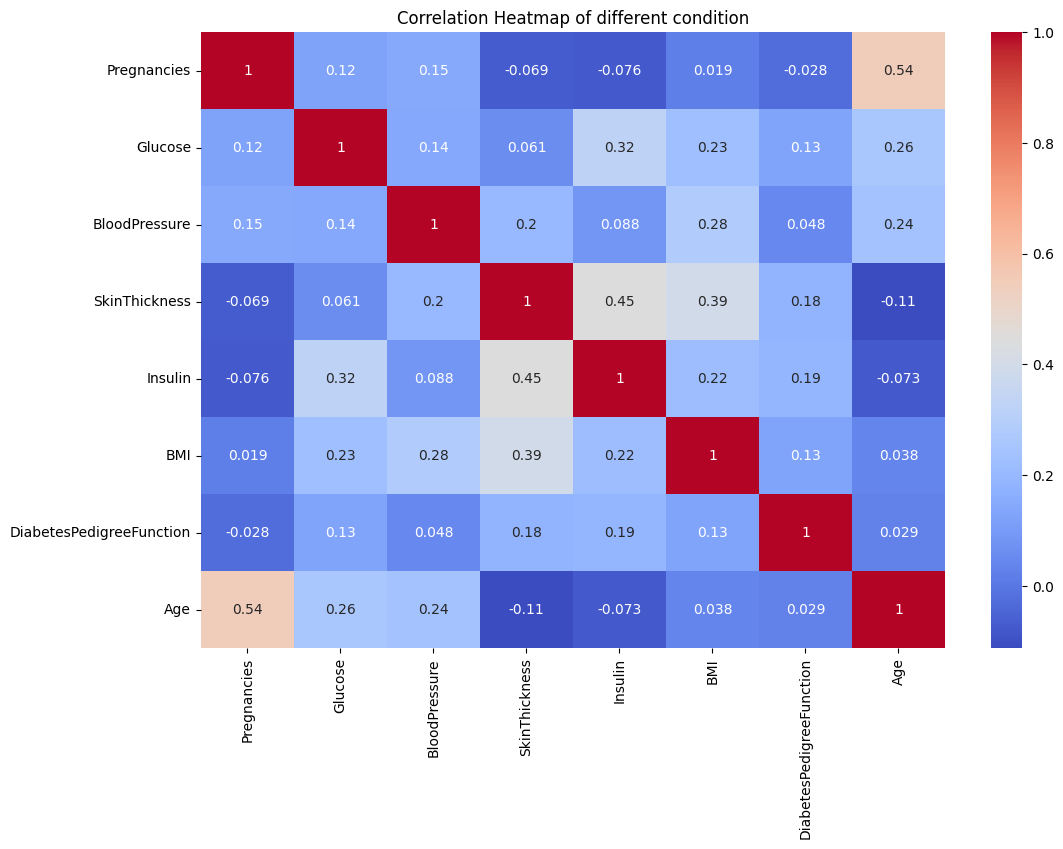

In [ ]:
# 10. Heatmap to show correlation between different different condition
plt.figure(figsize=(12, 8))
correlation_matrix = data[columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title('Correlation Heatmap of different condition')
plt.show()

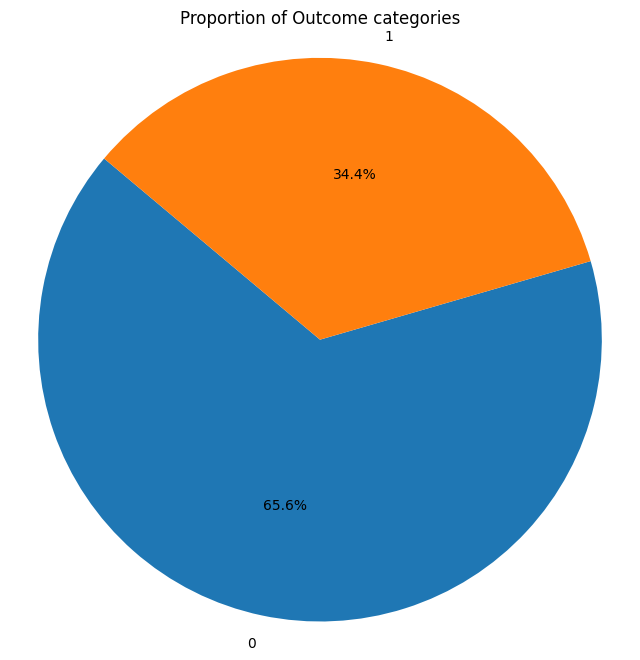

In [ ]:
# 8. Pie Chart for proportions in the 'ExerciseAngina' column
type_distribution = data['Outcome'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(type_distribution, labels=type_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Outcome categories')
plt.axis('equal')
plt.show()

In [ ]:
# Separate numerical columns
numerical_features = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']

In [ ]:
# Impute missing values for numerical data with the median
numerical_imputer = SimpleImputer(strategy='median')        # mean or median
data[numerical_features] = numerical_imputer.fit_transform(data[numerical_features])        # fit_transform will remove missing column

In [ ]:
# Step 3: Normalize or Standardize Numerical Features
scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

In [ ]:
# Define X (features) and y (target/label)
X = data.drop(columns=['Outcome'])  # All columns except 'Outcome'
y = data['Outcome']  # Target column

In [ ]:
# Step 5: Apply SMOTE to handle class imbalance

from sklearn.preprocessing import LabelEncoder

# Ensure y is a classification target (either 0 or 1) by converting it to integer
y = y.astype(int)

# Check if any values in y are outside the expected range (0, 1)
print("Unique values in y:", y.unique())

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the distribution after applying SMOTE
print("Original dataset class distribution:\n", pd.Series(y).value_counts())
print("Resampled dataset class distribution:\n", pd.Series(y_resampled).value_counts())


Unique values in y: [1 0]
Original dataset class distribution:
 Outcome
0    1816
1     952
Name: count, dtype: int64
Resampled dataset class distribution:
 Outcome
1    1816
0    1816
Name: count, dtype: int64


In [ ]:
# Step 6: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)   # here test_size=0.2 means 20% test data and 80% training and random test means after 42 data switch to testing

KNN Accuracy: 92.57%
Loss (1 - accuracy): 0.0743

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.88      0.92       377
           1       0.88      0.97      0.93       350

    accuracy                           0.93       727
   macro avg       0.93      0.93      0.93       727
weighted avg       0.93      0.93      0.93       727


Confusion Matrix:
[[332  45]
 [  9 341]]


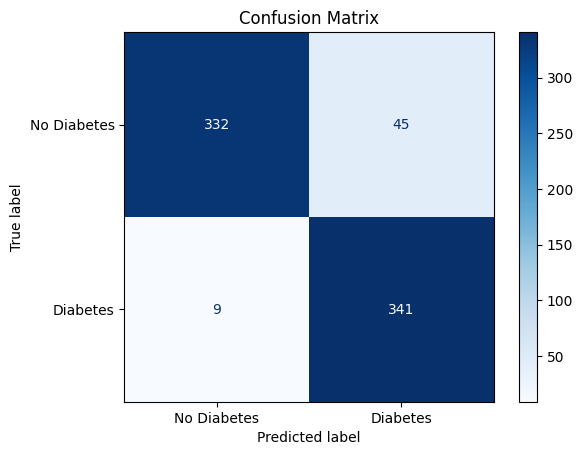

In [ ]:
# Step 7: Build KNN Model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Step 8: Model Evaluation
# Predict the test set
y_pred = knn.predict(X_test)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"KNN Accuracy: {accuracy * 100:.2f}%")

# Compute loss as (1 - accuracy)
loss = 1 - accuracy
print(f"Loss (1 - accuracy): {loss:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Plot Confusion Matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Diabetes", "Diabetes"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


Random Forest Accuracy: 99.45%
Loss (1 - accuracy): 0.0055

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       377
           1       0.99      0.99      0.99       350

    accuracy                           0.99       727
   macro avg       0.99      0.99      0.99       727
weighted avg       0.99      0.99      0.99       727


Confusion Matrix:
[[375   2]
 [  2 348]]


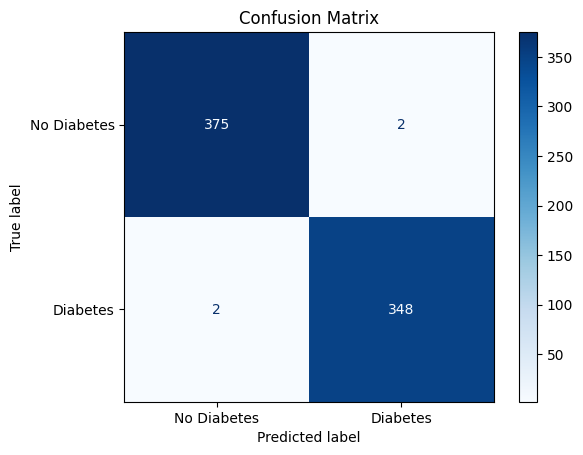

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Step 7: Build Random Forest Model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Step 8: Model Evaluation
# Predict the test set
y_pred = rf.predict(X_test)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy * 100:.2f}%")

# Compute loss as (1 - accuracy)
loss = 1 - accuracy
print(f"Loss (1 - accuracy): {loss:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Plot Confusion Matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Diabetes", "Diabetes"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

SVM Accuracy: 76.07%
Loss (1 - accuracy): 0.2393

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.80      0.78       377
           1       0.77      0.71      0.74       350

    accuracy                           0.76       727
   macro avg       0.76      0.76      0.76       727
weighted avg       0.76      0.76      0.76       727


Confusion Matrix:
[[303  74]
 [100 250]]


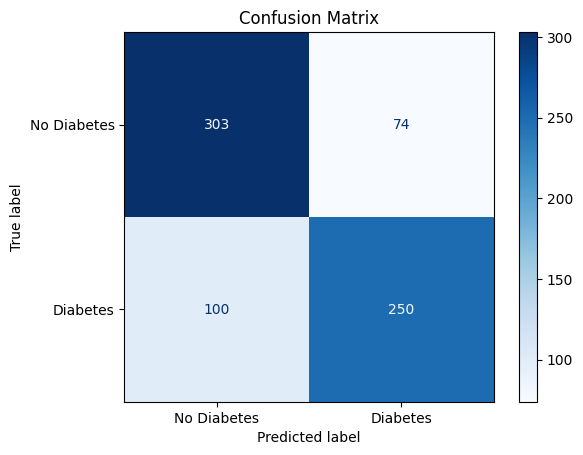

In [ ]:
from sklearn.svm import SVC
# Step 7: Build SVM Model
svm = SVC(probability=True, kernel='linear', random_state=42)
svm.fit(X_train, y_train)

# Step 8: Model Evaluation
# Predict the test set
y_pred = svm.predict(X_test)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"SVM Accuracy: {accuracy * 100:.2f}%")

# Compute loss as (1 - accuracy)
loss = 1 - accuracy
print(f"Loss (1 - accuracy): {loss:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Plot Confusion Matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Diabetes", "Diabetes"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

Logistic Regression Accuracy: 75.79%
Loss (1 - accuracy): 0.2421

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.79      0.77       377
           1       0.76      0.72      0.74       350

    accuracy                           0.76       727
   macro avg       0.76      0.76      0.76       727
weighted avg       0.76      0.76      0.76       727


Confusion Matrix:
[[298  79]
 [ 97 253]]


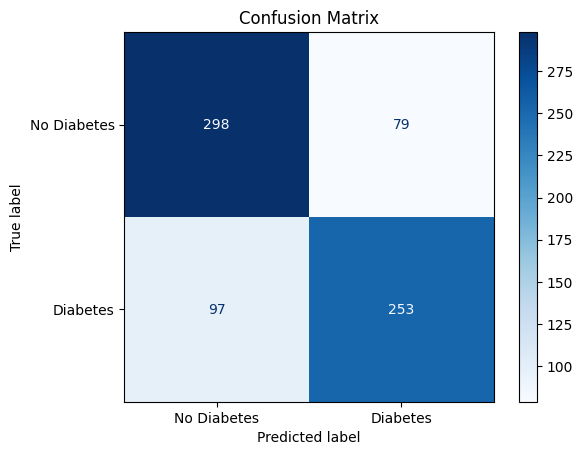

In [ ]:
from sklearn.linear_model import LogisticRegression
# Step 7: Build Logistic Regression Model
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train, y_train)

# Step 8: Model Evaluation
# Predict the test set
y_pred = lr.predict(X_test)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy * 100:.2f}%")

# Compute loss as (1 - accuracy)
loss = 1 - accuracy
print(f"Loss (1 - accuracy): {loss:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Plot Confusion Matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Diabetes", "Diabetes"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

Best Parameters: {'n_neighbors': 3, 'p': 2, 'weights': 'distance'}
KNN with Hyperparameter Tuning Accuracy: 99.45%
Loss (1 - accuracy): 0.0055

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       377
           1       0.99      0.99      0.99       350

    accuracy                           0.99       727
   macro avg       0.99      0.99      0.99       727
weighted avg       0.99      0.99      0.99       727


Confusion Matrix:
[[375   2]
 [  2 348]]


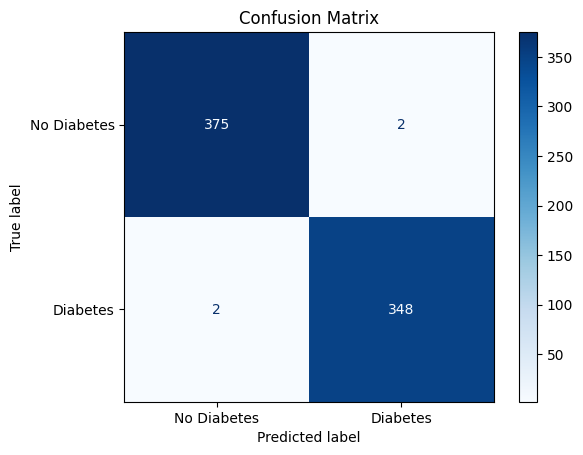

In [ ]:
#Hyperparameter Tuning to tune or optimize the model

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Step 7: Define the KNN model and parameters to tune
knn = KNeighborsClassifier()

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_neighbors': [3, 5, 7, 9],      # Test different values for the number of neighbors
    'weights': ['uniform', 'distance'],  # Use uniform or distance-based weights
    'p': [1, 2]                        # p=1 for Manhattan, p=2 for Euclidean distance
}

# Step 8: Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters from grid search
print(f"Best Parameters: {grid_search.best_params_}")

# Step 9: Build the best KNN model based on the grid search
best_knn = grid_search.best_estimator_

# Model Evaluation
# Predict the test set
y_pred = best_knn.predict(X_test)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"KNN with Hyperparameter Tuning Accuracy: {accuracy * 100:.2f}%")

# Compute loss as (1 - accuracy)
loss = 1 - accuracy
print(f"Loss (1 - accuracy): {loss:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Plot Confusion Matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Diabetes", "Diabetes"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()